In [ ]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.04G/2.04G [01:45<00:00, 22.3MB/s]
100% 2.04G/2.04G [01:45<00:00, 20.8MB/s]


In [ ]:
# Unzip the downloaded dataset
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
print(os.listdir("plantvillage dataset"))


print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['grayscale', 'color', 'segmented']
38
['Strawberry___Leaf_scorch', 'Tomato___Septoria_leaf_spot', 'Pepper,_bell___Bacterial_spot', 'Apple___Black_rot', 'Tomato___Early_blight']
38
['Strawberry___Leaf_scorch', 'Tomato___Septoria_leaf_spot', 'Pepper,_bell___Bacterial_spot', 'Apple___Black_rot', 'Tomato___Early_blight']
38
['Strawberry___Leaf_scorch', 'Tomato___Septoria_leaf_spot', 'Pepper,_bell___Bacterial_spot', 'Apple___Black_rot', 'Tomato___Early_blight']


In [ ]:

print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['5e8fe4a1-4b7c-44d6-bee6-2a97360a09f1___Mt.N.V_HL 9044.JPG', '8e026e59-ea04-4f21-832c-b7c4539dfe91___Mt.N.V_HL 6096.JPG', '05cff9d7-0f63-4b6e-9aa3-199cf9ffa64c___Mt.N.V_HL 9111.JPG', '32bba022-49d8-41ad-99e2-89af85eac71a___Mt.N.V_HL 6055.JPG', '99edf5b5-3b65-47bc-8eb9-c9ff2582a28d___Mt.N.V_HL 8972.JPG']


In [ ]:
# Dataset Path
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


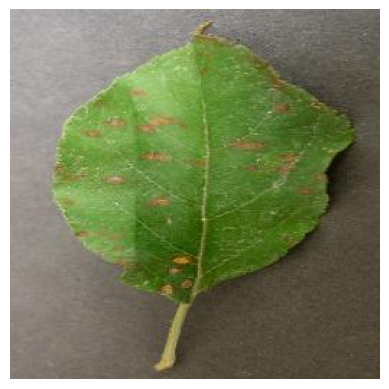

In [ ]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()


In [ ]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img)

[[[179 175 176]
  [181 177 178]
  [184 180 181]
  ...
  [115 112 105]
  [108 105  98]
  [101  98  91]]

 [[176 172 173]
  [177 173 174]
  [178 174 175]
  ...
  [113 110 103]
  [111 108 101]
  [109 106  99]]

 [[180 176 177]
  [180 176 177]
  [180 176 177]
  ...
  [108 105  98]
  [111 108 101]
  [114 111 104]]

 ...

 [[137 128 119]
  [131 122 113]
  [125 116 107]
  ...
  [ 74  65  48]
  [ 74  65  48]
  [ 73  64  47]]

 [[136 127 118]
  [132 123 114]
  [128 119 110]
  ...
  [ 77  69  50]
  [ 75  67  48]
  [ 75  67  48]]

 [[133 124 115]
  [133 124 115]
  [132 123 114]
  ...
  [ 81  73  54]
  [ 80  72  53]
  [ 79  71  52]]]


In [ ]:
# Image Parameters
img_size = 224
batch_size = 32

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# # Image Data Generators
# data_gen = ImageDataGenerator(
#     rescale=1.0 / 255,
#     validation_split = 0.2  # Use 20% of data for validation
# )
data_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1.0 / 255,
    validation_split = 0.2,  # Use 20% of data for validation
    fill_mode='nearest')

In [ ]:
# # Train Generator
# train_generator = data_gen.flow_from_directory(
#     base_dir,
#     target_size=(img_size, img_size),
#     batch_size=batch_size,
#     subset='training',
#     class_mode='categorical'
# )
train_generator = data_gen.flow_from_directory(base_dir,
                                               target_size=(150, 150),
                                               batch_size=32,
                                               subset='training',
                                               class_mode='categorical')

Found 43456 images belonging to 38 classes.


In [ ]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


CNN - Convolutional Neural Network

In [ ]:
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [ ]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 256)               4

In [ ]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=5,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/5
1358/1358 [==============================] - 115s 80ms/step - loss: 0.9657 - accuracy: 0.7385 - val_loss: 0.4243 - val_accuracy: 0.8628
Epoch 2/5
1358/1358 [==============================] - 107s 79ms/step - loss: 0.2839 - accuracy: 0.9097 - val_loss: 0.3805 - val_accuracy: 0.8814
Epoch 3/5
1358/1358 [==============================] - 110s 81ms/step - loss: 0.1311 - accuracy: 0.9576 - val_loss: 0.4107 - val_accuracy: 0.8898
Epoch 4/5
1358/1358 [==============================] - 106s 78ms/step - loss: 0.0823 - accuracy: 0.9726 - val_loss: 0.4507 - val_accuracy: 0.8921
Epoch 5/5
1358/1358 [==============================] - 106s 78ms/step - loss: 0.0692 - accuracy: 0.9780 - val_loss: 0.5580 - val_accuracy: 0.8697


In [ ]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
339/339 [==============================] - 18s 53ms/step - loss: 0.5580 - accuracy: 0.8697
Validation Accuracy: 86.97%


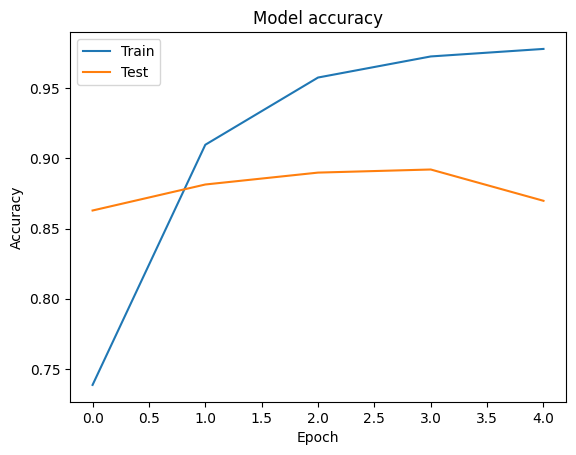

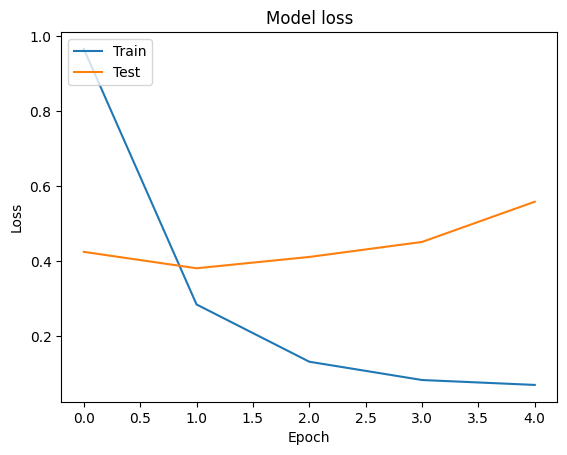

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Function to Load and Preprocess the Image using Pillow(Yostiq yordamida tasvirni yuklash va qayta ishlash funksiyasi)
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

In [ ]:
# Function to Predict the Class of an Image(Tasvir sinfini bashorat qilish funksiyasi)
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [ ]:
# Create a mapping from class indices to class names(Sinf indekslaridan sinf nomlarigacha xaritalash yarating)
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [ ]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [ ]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

1/1 [==============================] - 0s 69ms/step
Predicted Class Name:  Apple___Black_rot 



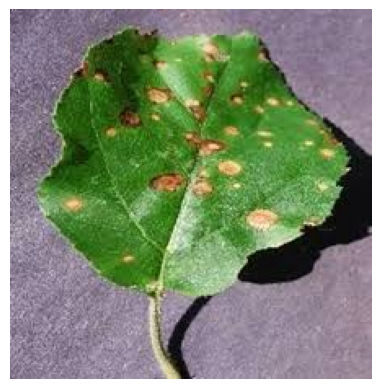

In [ ]:
# Example Usage
image_path = '/content/plant3.jfif'
#image_path = '/content/test_blueberry_healthy.jpg'
#image_path = '/content/test_potato_early_blight.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name: ", predicted_class_name, "\n")
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [ ]:
model.save('plant_disease_prediction_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save("C:/Users/user/Desktop/Dasturlash/O'simlik_kasalliklar_CNN_bot/plant_disease_prediction_model.h5")


# Predict

In [ ]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

# Saqlangan modelni yuklash
model = load_model('plant_disease_prediction_model.h5')

In [ ]:
# Yangi rasmni tayyorlash
def prepare_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.  # Normalizatsiya
    return img_array

In [ ]:
# Rasm yo'lini ko'rsating
img_path = '/content/plant3.jfif'

In [ ]:
# Rasmni tayyorlang (rasmning o'lchamini modelga moslang)
img = prepare_image(img_path, target_size=(224, 224))  # Eslatma: Target size modelga qarab o'zgarishi mumkin

In [ ]:
# Bashorat qilish
preds = model.predict(img)

1/1 [==============================] - 0s 21ms/step


In [ ]:
# Bashoratlarni olish va ularni qayta ishlash
predicted_class = np.argmax(preds, axis=1)
probs = np.max(preds, axis=1)

Predicted class: [1]
Probabilities: [0.9999968]
Raw predictions: [[2.5731201e-10 9.9999678e-01 1.6562838e-11 4.7441624e-17 2.3947385e-12
  1.7261104e-11 5.5787071e-14 4.5929510e-20 1.1125268e-13 7.1333484e-20
  8.5687266e-27 1.3042499e-10 9.0911491e-14 5.0877653e-16 1.6981537e-15
  3.0427454e-13 1.1788659e-12 5.7114156e-22 7.1233814e-09 1.9468021e-11
  1.7393236e-18 1.3551462e-16 2.1996103e-13 3.8817110e-19 8.1556627e-17
  2.6189931e-19 2.2592235e-17 3.9199062e-09 9.4818799e-15 7.4359225e-09
  3.0217043e-06 1.6812275e-15 1.2927971e-07 1.5912592e-19 1.0335799e-11
  2.3577343e-11 9.7419448e-14 3.5773186e-14]]


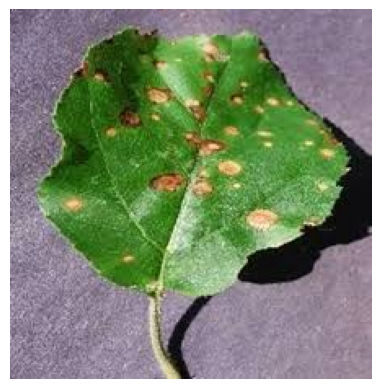

In [ ]:
# Natijalarni chiqarish
print(f'Predicted class: {predicted_class}')
print(f'Probabilities: {probs}')
print(f'Raw predictions: {preds}')
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()